# Data Analysis 

## Santander Bike Data vs Weather Conditions

#### Importing Libraries

In [280]:
# Importing libraries
import os
import warnings
import csv
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # visualing matplotlib
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

## The path where we have datasets
print(os.listdir("./data"))

['background2.jpg', 'Data.csv', 'data_analysis.py', 'data_averages.csv', 'data_av_timesplit.csv', 'formatter.py', 'time_split.py']


#### Loading Data

In [348]:
filename = "data/data_averages.csv"
data = pd.read_csv(filename)

# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(filename, 'r') as csvfile: 
                 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader)
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
        
timestamp = []
av_bike = []
av_temp = []
av_wind = []
norm_av_bike = []
norm_av_temp = []
norm_av_wind = []

for i in rows:
    timestamp.append(i[0])
    av_bike.append(float(i[1]))
    av_temp.append(float(i[2]))
    av_wind.append(float(i[3]))
    norm_av_bike.append(float(i[4]))
    norm_av_temp.append(float(i[5]))
    norm_av_wind.append(float(i[6]))
    
print(data.head)

<bound method NDFrame.head of                Timestamp  Average Bikes in Use  Average Temperature  \
0    2018-12-28 17:20:03                 14.54                 8.46   
1    2018-12-28 17:40:04                 14.35                 8.29   
2    2018-12-28 18:00:05                 14.35                 8.29   
3    2018-12-28 18:20:03                 14.46                 8.29   
4    2018-12-28 18:40:04                 14.61                 8.29   
5    2018-12-28 19:00:05                 14.61                 8.29   
6    2018-12-28 19:20:03                 14.61                 8.29   
7    2018-12-28 19:40:04                 14.67                 8.20   
8    2018-12-28 20:00:05                 14.67                 8.20   
9    2018-12-28 20:20:04                 14.67                 8.20   
10   2018-12-28 20:40:03                 14.67                 8.20   
11   2018-12-28 21:20:04                 14.98                 8.23   
12   2018-12-28 21:40:04                 15.11 

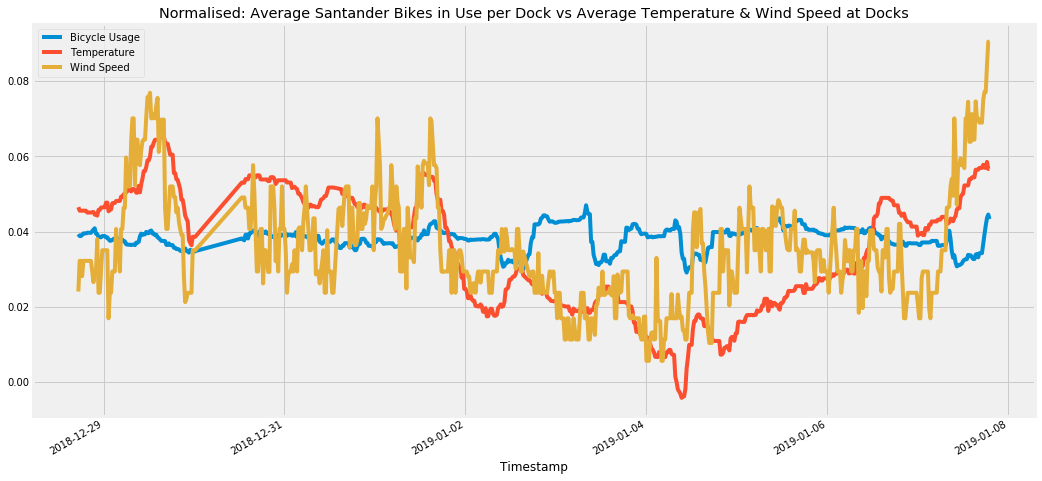

In [272]:
# ax = data.plot(x='Normalised Average Bikes in Use', y='Normalised Average Bikes in Use')
# fig = ax.get_figure()
# fig.set_size_inches(20, 10)

plt.figure(figsize=(16, 8))

data['Normalised Average Bikes in Use'].plot(label ="Bicycle Usage") 
data['Normalised Average Temperature'].plot(label ="Temperature") 
data['Normalised Average Wind Speed'].plot(label="Wind Speed")
plt.title("Normalised: Average Santander Bikes in Use per Dock vs Average Temperature & Wind Speed at Docks")
plt.legend()
plt.show()

In [198]:
print(data.corr())
print(data.index)

                                 Average Bikes in Use  Average Temperature  \
Average Bikes in Use                         1.000000            -0.147776   
Average Temperature                         -0.147776             1.000000   
Average Wind Speed                          -0.120108             0.628680   
Normalised Average Bikes in Use              1.000000            -0.147776   
Normalised Average Temperature              -0.147776             1.000000   
Normalised Average Wind Speed               -0.120108             0.628680   

                                 Average Wind Speed  \
Average Bikes in Use                      -0.120108   
Average Temperature                        0.628680   
Average Wind Speed                         1.000000   
Normalised Average Bikes in Use           -0.120108   
Normalised Average Temperature             0.628680   
Normalised Average Wind Speed              1.000000   

                                 Normalised Average Bikes in Use  \

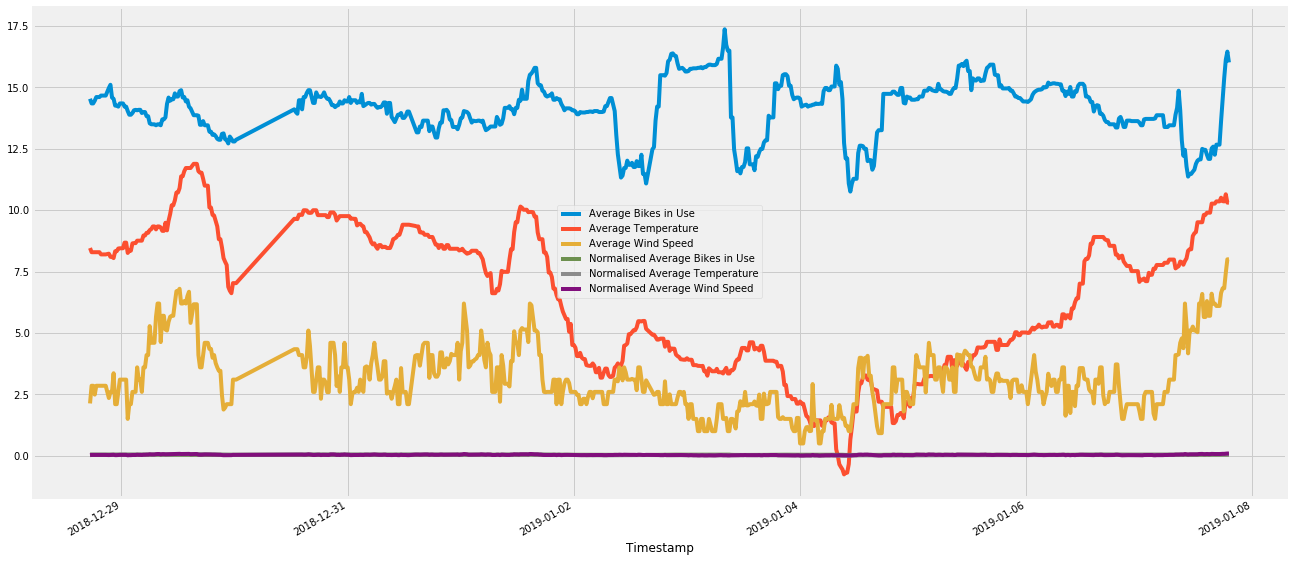

In [206]:
ax = data.plot()
fig = ax.get_figure()
fig.set_size_inches(20, 10)

In [347]:
#regression model using 2 variables as inputs to model 1 output
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm


X = data[['Average Temperature','Average Wind Speed']] # here we have 2 variables for multiple regression
Y = data['Average Bikes in Use']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Temperature = 8
New_Wind_Speed = 2
print ('Predicted Number of Bikes: \n', int(regr.predict([[New_Temperature, New_Wind_Speed]])))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 14.540131147924843
Coefficients: 
 [-0.04598338 -0.03827433]
Predicted Number of Bikes: 
 14
                             OLS Regression Results                             
Dep. Variable:     Average Bikes in Use   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.020
Method:                   Least Squares   F-statistic:                     7.991
Date:                  Thu, 10 Jan 2019   Prob (F-statistic):           0.000372
Time:                          06:06:18   Log-Likelihood:                -1028.9
No. Observations:                   680   AIC:                             2064.
Df Residuals:                       677   BIC:                             2077.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.9

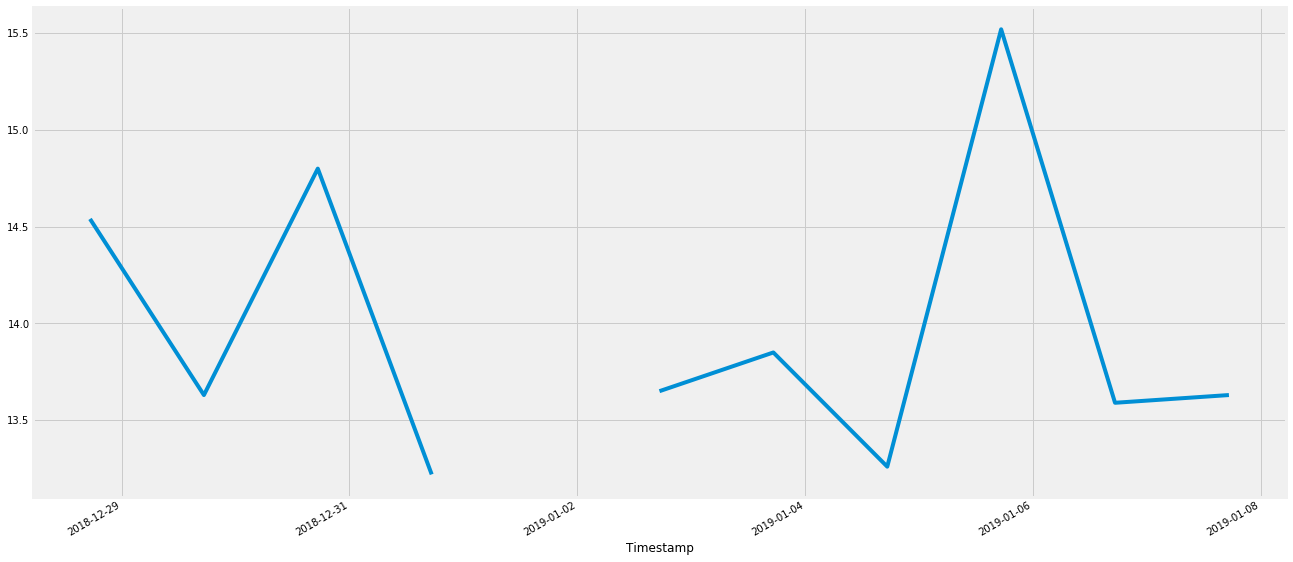

In [223]:
ts = data["Average Bikes in Use"]
plt.figure(figsize=(20, 10))
ts.asfreq('D').plot()

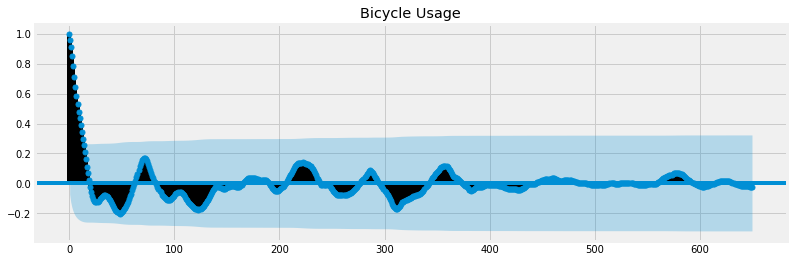

In [316]:
# Autocorrelation of Bike Usage
acf = plot_acf(ts, lags=650,title="Bicycle Usage")
acf.set_figheight(4)
acf.set_figwidth(12)
plt.show()

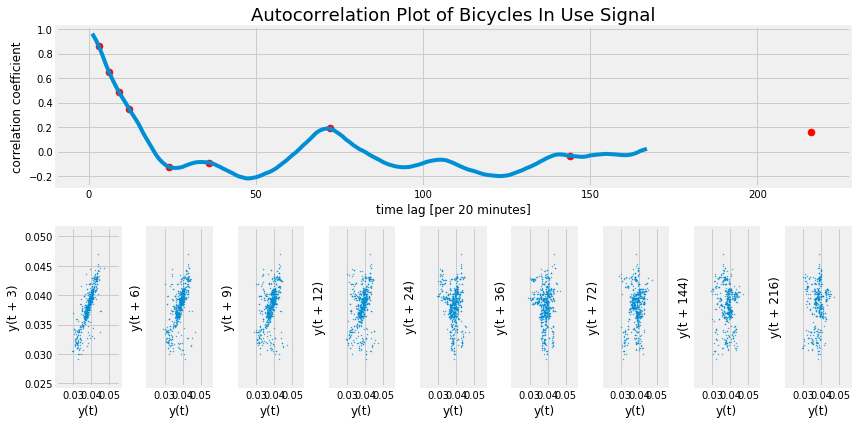

In [220]:
#%% show autocorr and lag plots
import matplotlib.gridspec as gridspec
from pandas.plotting import autocorrelation_plot, lag_plot


titles = 'Normalised Average Bikes in Use'
selectedLagPoints = [3,6,9,12,24,36,72,144,216]
maxLagDays = 7

originalSignal = data[titles]

# set grid spec of the subplots
plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, len(selectedLagPoints))
axTopRow = plt.subplot(gs[0, :])
axBottomRow = []
for i in range(len(selectedLagPoints)):
    axBottomRow.append(plt.subplot(gs[1, i]))

# plot autocorr
allTimeLags = np.arange(1,maxLagDays*24)
autoCorr = [originalSignal.autocorr(lag=dt) for dt in allTimeLags]
axTopRow.plot(allTimeLags,autoCorr); 
axTopRow.set_title('Autocorrelation Plot of Bicycles In Use Signal', fontsize=18);
axTopRow.set_xlabel('time lag [per 20 minutes]'); axTopRow.set_ylabel('correlation coefficient')
selectedAutoCorr = [originalSignal.autocorr(lag=dt) for dt in selectedLagPoints]
axTopRow.scatter(x=selectedLagPoints, y=selectedAutoCorr, s=50, c='r')

# plot scatter plot of selected points
for i in range(len(selectedLagPoints)):
    lag_plot(originalSignal, lag=selectedLagPoints[i], s=1, alpha=0.6, ax=axBottomRow[i])    
    if i >= 1:
        axBottomRow[i].set_yticks([],[])
plt.tight_layout()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  678
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3777.879
Method:                       css-mle   S.D. of innovations              0.001
Date:                Thu, 10 Jan 2019   AIC                          -7549.759
Time:                        06:01:27   BIC                          -7536.201
Sample:                             1   HQIC                         -7544.510
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.332e-07   2.36e-05     -0.010      0.992   -4.65e-05     4.6e-05
ar.L1.D.y     -0.4977      0.033    -14.901      0.000      -0.563      -0.432
                                    Roots           

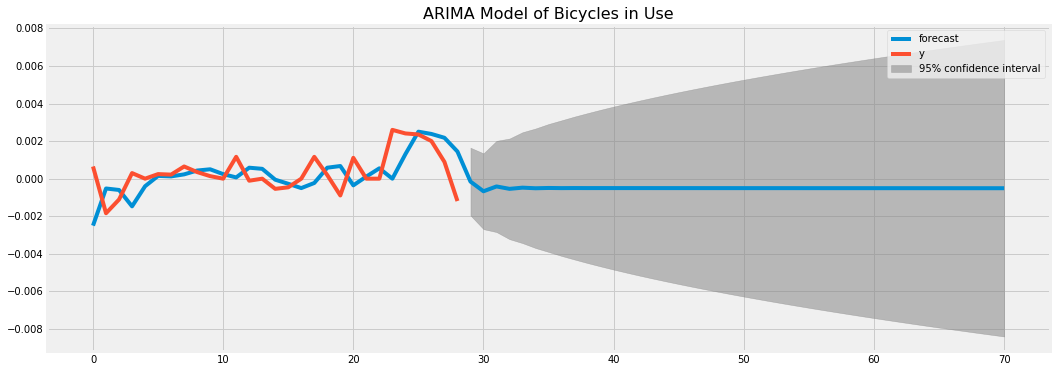

In [340]:
# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(data["Normalised Average Bikes in Use"].diff().iloc[1:].values, order=(1,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=650, end=720)
plt.title('ARIMA Model of Bicycles in Use', fontsize=16);
plt.show()

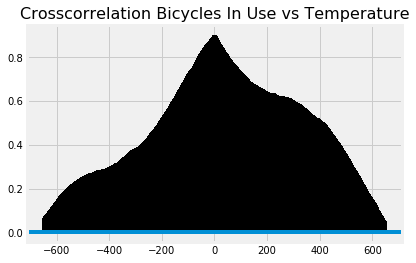

In [327]:
x = data['Normalised Average Bikes in Use']
y = data['Normalised Average Temperature']

r = plt.xcorr(x,y, maxlags=650)
plt.title('Crosscorrelation Bicycles In Use vs Temperature', fontsize=16);
plt.x = ("lags")
# print(r)

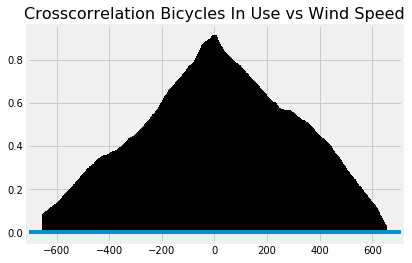

In [328]:
x = data['Normalised Average Bikes in Use']
y = data['Normalised Average Wind Speed']

r = plt.xcorr(x,y, maxlags=650)
plt.title('Crosscorrelation Bicycles In Use vs Wind Speed', fontsize=16);

In [202]:
filename = "data/data_av_timesplit.csv"
data_timesplit = pd.read_csv(filename)

# initializing the titles and rows list 
fields = [] 
rows = [] 
  
# reading csv file 
with open(filename, 'r') as csvfile: 
                 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader)
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
        

In [204]:
data_timesplit.corr()

,bike0,temp0,wind0,bike1,temp1,wind1,bike2,temp2,wind2,bike3,...,wind20,bike21,temp21,wind21,bike22,temp22,wind22,bike23,temp23,wind23
bike0,1.000000,-0.310999,-0.329193,-0.166306,-0.505964,-0.182837,0.110404,-0.503532,-0.377260,0.097934,...,-0.384750,0.837684,-0.400702,-0.113593,0.684408,-0.381680,-0.032997,0.693799,-0.334970,-0.050042
temp0,-0.310999,1.000000,0.612844,-0.436386,0.657753,-0.007567,-0.573255,0.746093,0.222693,-0.598646,...,0.648700,-0.575360,0.958435,0.622019,-0.492006,0.871661,0.418948,-0.514479,0.894197,0.696315
wind0,-0.329193,0.612844,1.000000,-0.188382,0.298206,-0.122938,-0.242786,0.395802,0.026448,-0.273814,...,0.624937,-0.531517,0.540867,0.729146,-0.593502,0.504196,0.562068,-0.566164,0.522330,0.623754
bike1,-0.166306,-0.436386,-0.188382,1.000000,-0.333507,-0.123987,0.617944,-0.374937,-0.307847,0.603017,...,-0.223283,0.017429,-0.251877,-0.296302,-0.179382,-0.179024,-0.026843,-0.127388,-0.222038,-0.243234
temp1,-0.505964,0.657753,0.298206,-0.333507,1.000000,0.293148,-0.395328,0.913544,0.407058,-0.398925,...,0.362232,-0.635083,0.590492,0.385283,-0.532978,0.432467,-0.120820,-0.527143,0.440524,0.115390
wind1,-0.182837,-0.007567,-0.122938,-0.123987,0.293148,1.000000,-0.260341,0.208101,0.804311,-0.257577,...,-0.129469,-0.146720,-0.123046,0.115540,0.032669,-0.116169,-0.327710,0.070531,-0.073353,-0.135953
bike2,0.110404,-0.573255,-0.242786,0.617944,-0.395328,-0.260341,1.000000,-0.437923,-0.430613,0.986696,...,-0.375343,0.239989,-0.482251,-0.387172,-0.028760,-0.531100,-0.270425,0.006529,-0.598311,-0.434745
temp2,-0.503532,0.746093,0.395802,-0.374937,0.913544,0.208101,-0.437923,1.000000,0.448863,-0.449915,...,0.521585,-0.634340,0.681073,0.459260,-0.559668,0.581323,0.017757,-0.547445,0.583780,0.241596
wind2,-0.377260,0.222693,0.026448,-0.307847,0.407058,0.804311,-0.430613,0.448863,1.000000,-0.417633,...,0.191592,-0.335573,0.097348,0.274384,-0.143488,0.077840,-0.260176,-0.123347,0.128128,0.033861
bike3,0.097934,-0.598646,-0.273814,0.603017,-0.398925,-0.257577,0.986696,-0.449915,-0.417633,1.000000,...,-0.394668,0.261047,-0.509386,-0.440836,0.005416,-0.555823,-0.309937,0.029782,-0.623234,-0.487400


In [370]:
# Ordinary Least Squares Regression studies run on datasets which had been split by hour of the day

from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

for i in range(24):
    X = data_timesplit[['temp' + str(i),'wind' + str(i)]] # here we have 2 variables for multiple regression
    Y = data_timesplit['bike' + str(i)]

    # with sklearn
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

#     print('Intercept: \n', regr.intercept_)
#     print('Coefficients: \n', regr.coef_)



    # prediction with sklearn
    New_Temperature = 10
    New_Wind_Speed = 5
#     print ('Predicted Number of Bikes: \n', int(regr.predict([[New_Temperature, New_Wind_Speed]])))


    # with statsmodels
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 

    print_model = model.summary()
    print(i,":00 to",i,":59", round (model.rsquared, 3))
print(print_model)

0 :00 to 0 :59 0.127
1 :00 to 1 :59 0.112
2 :00 to 2 :59 0.26
3 :00 to 3 :59 0.229
4 :00 to 4 :59 0.25
5 :00 to 5 :59 0.435
6 :00 to 6 :59 0.496
7 :00 to 7 :59 0.531
8 :00 to 8 :59 0.502
9 :00 to 9 :59 0.053
10 :00 to 10 :59 0.206
11 :00 to 11 :59 0.231
12 :00 to 12 :59 0.282
13 :00 to 13 :59 0.224
14 :00 to 14 :59 0.326
15 :00 to 15 :59 0.266
16 :00 to 16 :59 0.012
17 :00 to 17 :59 0.025
18 :00 to 18 :59 0.41
19 :00 to 19 :59 0.591
20 :00 to 20 :59 0.53
21 :00 to 21 :59 0.411
22 :00 to 22 :59 0.249
23 :00 to 23 :59 0.214
                            OLS Regression Results                            
Dep. Variable:                 bike23   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.125
Date:                Thu, 10 Jan 2019   Prob (F-statistic):             0.0630
Time:                        08:10:14   Log-Likelihood:                -26.75